# TimeSeries for CSI Data

In [126]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import datetime

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [127]:
# Loading dataset
df = pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv', header=0, parse_dates=True, squeeze=True)
df.head()

,time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_54,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_62,Subcar_63
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,224.555116,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,224.804359,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,238.415604,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,265.414770,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,233.540146,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592


In [128]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1095 non-null   int64  
 1   Subcar_0            1095 non-null   float64
 2   Subcar_1            1095 non-null   float64
 3   Subcar_2            1095 non-null   float64
 4   Subcar_3            1095 non-null   float64
 5   Subcar_4            1095 non-null   float64
 6   Subcar_5            1095 non-null   float64
 7   Subcar_6            1095 non-null   float64
 8   Subcar_7            1095 non-null   float64
 9   Subcar_8            1095 non-null   float64
 10  Subcar_9            1095 non-null   float64
 11  Subcar_10           1095 non-null   float64
 12  Subcar_11           1095 non-null   float64
 13  Subcar_12           1095 non-null   float64
 14  Subcar_13           1095 non-null   float64
 15  Subcar_14           1095 non-null   float64
 16  Subcar

In [132]:
# creating a dataframe from the csv file
data = pd.DataFrame(pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv'))
  
# unit='s' to convert it into epoch time
data['time'] = pd.to_datetime(data['time'],
                                  unit='s')
  
data['Modified Datetime'] = data['time'].dt.strftime('%d-%m-%Y %H:%M')
  
# checking our dataframe once again
data.head()

,time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_62,Subcar_63,Modified Datetime
0,2021-07-06 06:49:56,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,06:49
1,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,06:49
2,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,06:49
3,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,06:49
4,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,06:49


In [133]:
data.loc[0, 'time']

Timestamp('2021-07-06 06:49:56')

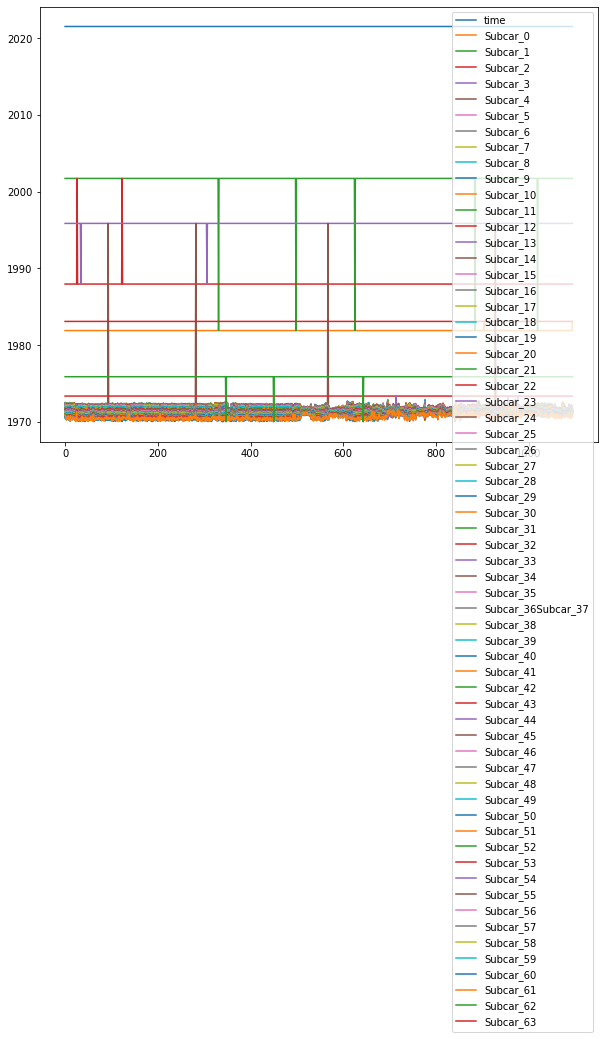

In [138]:

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Subcarriers",
       title="CSI_Timeseries")

plt.show()

# data.plot()
# plt.show()